# Nearest Neighbours

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [6]:
crimes_df = pd.read_csv("crimes_processed.csv")
meuse_df = pd.read_csv("meuse_processed.csv")

In [7]:
meuse_df

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
0,181072,333611,2.459589,4.442651,5.700444,6.929517,7.909,0.001358,13.6,1,1,1,Ah,50
1,181025,333558,2.151762,4.394449,5.624018,7.039660,6.983,0.012224,14.0,1,1,1,Ah,30
2,181165,333537,1.871802,4.219508,5.293305,6.461468,7.800,0.103029,13.0,1,1,1,Ah,150
3,181298,333484,0.955511,4.394449,4.753590,5.549076,7.655,0.190094,8.0,1,2,0,Ga,270
4,181307,333330,1.029619,3.871201,4.762174,5.594711,7.480,0.277090,8.7,1,2,0,Ah,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,179184,330182,-0.223144,2.995732,3.891820,5.111988,8.128,0.423837,4.7,3,1,0,Am,540
151,179085,330292,1.131402,3.663562,5.153292,6.206576,8.577,0.423837,9.1,3,1,0,Ah,520
152,178875,330311,0.741937,3.433987,4.779123,5.834811,8.429,0.277090,6.5,3,1,0,Ah,350
153,179466,330381,-0.223144,3.044522,3.931826,5.087596,9.406,0.358606,5.7,3,1,0,W,460


In [8]:
crimes_df

,Latitude,Longitude,n,location_id
0,41.644590,-87.615880,1,1
1,41.647037,-87.616647,1,2
2,41.647039,-87.616098,2,3
3,41.647180,-87.544241,1,4
4,41.647716,-87.542811,1,5
...,...,...,...,...
25449,42.022526,-87.672401,1,25450
25450,42.022529,-87.666324,1,25451
25451,42.022535,-87.673398,2,25452
25452,42.022536,-87.673711,1,25453


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import NearestNeighbors
import time

# Meuse Dataset

In [17]:
# Convert columns to numpy arrays
observed_location_columns = ['x', 'y']
observed_values_column = 'zinc'
observed_locations = meuse_df[observed_location_columns].values
observed_values = meuse_df[observed_values_column].values

# Define the range of n_neighbors to test
neighbors_range = range(1, 10)

# Initialize dictionary to store performance metrics for each n_neighbors value
performance_metrics = {}

for n_neighbors in neighbors_range:
    nn_model = NearestNeighbors(n_neighbors=n_neighbors)
    true_values = []
    predictions = []

    # Start timing LOOCV for the current n_neighbors
    start_time_loocv = time.time()

    # Perform LOOCV
    for loo_idx in range(observed_locations.shape[0]):
        train_idx = np.arange(observed_locations.shape[0]) != loo_idx
        test_idx = np.arange(observed_locations.shape[0]) == loo_idx
        
        train_locations = observed_locations[train_idx]
        train_values = observed_values[train_idx]
        test_location = observed_locations[test_idx].reshape(1, -1)
        test_value = observed_values[test_idx]
        
        nn_model.fit(train_locations)
        distances, indices = nn_model.kneighbors(test_location)
        predicted_value = np.mean(train_values[indices])
        
        true_values.append(test_value[0])
        predictions.append(predicted_value)

    # Calculate and store performance metrics for the current n_neighbors
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    performance_metrics[n_neighbors] = {'MAE': mae, 'RMSE': rmse}

    # End timing LOOCV
    end_time_loocv = time.time()
    print(f"n_neighbors: {n_neighbors}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Computation Time: {end_time_loocv - start_time_loocv:.2f} seconds")


n_neighbors: 1, MAE: 0.40, RMSE: 0.57, Computation Time: 0.15 seconds
n_neighbors: 2, MAE: 0.36, RMSE: 0.50, Computation Time: 0.13 seconds
n_neighbors: 3, MAE: 0.33, RMSE: 0.44, Computation Time: 0.13 seconds
n_neighbors: 4, MAE: 0.35, RMSE: 0.46, Computation Time: 0.14 seconds
n_neighbors: 5, MAE: 0.36, RMSE: 0.47, Computation Time: 0.13 seconds
n_neighbors: 6, MAE: 0.37, RMSE: 0.48, Computation Time: 0.14 seconds
n_neighbors: 7, MAE: 0.37, RMSE: 0.49, Computation Time: 0.14 seconds
n_neighbors: 8, MAE: 0.38, RMSE: 0.49, Computation Time: 0.14 seconds
n_neighbors: 9, MAE: 0.39, RMSE: 0.50, Computation Time: 0.14 seconds


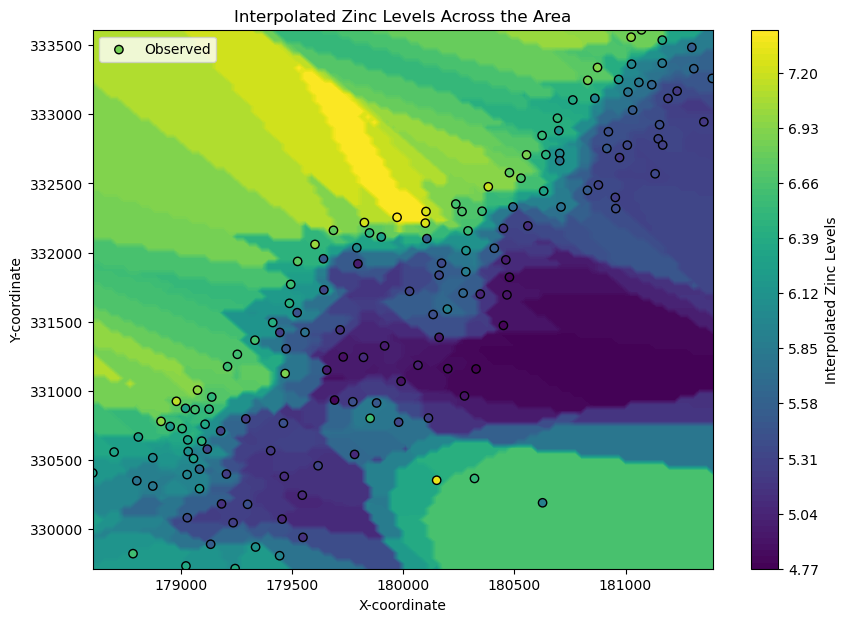

Spatial Interpolation Computation Time: 0.01 seconds


In [18]:
# Convert columns to numpy arrays
observed_location_columns = ['x', 'y']
observed_values_column = 'zinc'
observed_locations = meuse_df[observed_location_columns].values
observed_values = meuse_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 3

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data
x_min, x_max = observed_locations[:, 0].min() - 1, observed_locations[:, 0].max() + 1
y_min, y_max = observed_locations[:, 1].min() - 1, observed_locations[:, 1].max() + 1
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(10, 7))
plt.contourf(x_grid, y_grid, z_grid, cmap='viridis', levels=100)
plt.colorbar(label='Interpolated Zinc Levels')
plt.scatter(meuse_df['x'], meuse_df['y'], c=meuse_df['zinc'], cmap='viridis', edgecolor='k', label='Observed')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('Interpolated Zinc Levels Across the Area')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

# Crimes Dataset

## neighbours range = 1 to 10

In [19]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Define the range of n_neighbors to test
neighbors_range = range(1, 10)

# Initialize dictionary to store performance metrics for each n_neighbors value
performance_metrics = {}

for n_neighbors in neighbors_range:
    nn_model = NearestNeighbors(n_neighbors=n_neighbors)
    true_values = []
    predictions = []

    # Start timing LOOCV for the current n_neighbors
    start_time_loocv = time.time()

    # Perform LOOCV
    for loo_idx in range(observed_locations.shape[0]):
        train_idx = np.arange(observed_locations.shape[0]) != loo_idx
        test_idx = np.arange(observed_locations.shape[0]) == loo_idx
        
        train_locations = observed_locations[train_idx]
        train_values = observed_values[train_idx]
        test_location = observed_locations[test_idx].reshape(1, -1)
        test_value = observed_values[test_idx]
        
        nn_model.fit(train_locations)
        distances, indices = nn_model.kneighbors(test_location)
        predicted_value = np.mean(train_values[indices])
        
        true_values.append(test_value[0])
        predictions.append(predicted_value)

    # Calculate and store performance metrics for the current n_neighbors
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    performance_metrics[n_neighbors] = {'MAE': mae, 'RMSE': rmse}

    # End timing LOOCV
    end_time_loocv = time.time()
    print(f"n_neighbors: {n_neighbors}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Computation Time: {end_time_loocv - start_time_loocv:.2f} seconds")


n_neighbors: 1, MAE: 0.38, RMSE: 1.23, Computation Time: 255.47 seconds
n_neighbors: 2, MAE: 0.37, RMSE: 1.06, Computation Time: 256.05 seconds
n_neighbors: 3, MAE: 0.37, RMSE: 1.01, Computation Time: 254.60 seconds
n_neighbors: 4, MAE: 0.36, RMSE: 0.98, Computation Time: 262.01 seconds
n_neighbors: 5, MAE: 0.36, RMSE: 0.96, Computation Time: 256.65 seconds
n_neighbors: 6, MAE: 0.36, RMSE: 0.95, Computation Time: 269.43 seconds
n_neighbors: 7, MAE: 0.36, RMSE: 0.94, Computation Time: 262.72 seconds
n_neighbors: 8, MAE: 0.36, RMSE: 0.93, Computation Time: 264.82 seconds
n_neighbors: 9, MAE: 0.36, RMSE: 0.93, Computation Time: 227.93 seconds


## neighbours range = 160 to 1600

In [20]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Define the range of n_neighbors to test
neighbors_range = range(160, 1600, 160)

# Initialize dictionary to store performance metrics for each n_neighbors value
performance_metrics = {}

for n_neighbors in neighbors_range:
    nn_model = NearestNeighbors(n_neighbors=n_neighbors)
    true_values = []
    predictions = []

    # Start timing LOOCV for the current n_neighbors
    start_time_loocv = time.time()

    # Perform LOOCV
    for loo_idx in range(observed_locations.shape[0]):
        train_idx = np.arange(observed_locations.shape[0]) != loo_idx
        test_idx = np.arange(observed_locations.shape[0]) == loo_idx
        
        train_locations = observed_locations[train_idx]
        train_values = observed_values[train_idx]
        test_location = observed_locations[test_idx].reshape(1, -1)
        test_value = observed_values[test_idx]
        
        nn_model.fit(train_locations)
        distances, indices = nn_model.kneighbors(test_location)
        predicted_value = np.mean(train_values[indices])
        
        true_values.append(test_value[0])
        predictions.append(predicted_value)

    # Calculate and store performance metrics for the current n_neighbors
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    performance_metrics[n_neighbors] = {'MAE': mae, 'RMSE': rmse}

    # End timing LOOCV
    end_time_loocv = time.time()
    print(f"n_neighbors: {n_neighbors}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Computation Time: {end_time_loocv - start_time_loocv:.2f} seconds")


n_neighbors: 160, MAE: 0.36, RMSE: 0.89, Computation Time: 194.59 seconds
n_neighbors: 320, MAE: 0.36, RMSE: 0.89, Computation Time: 198.88 seconds
n_neighbors: 480, MAE: 0.36, RMSE: 0.89, Computation Time: 198.42 seconds
n_neighbors: 640, MAE: 0.37, RMSE: 0.90, Computation Time: 198.58 seconds
n_neighbors: 800, MAE: 0.37, RMSE: 0.90, Computation Time: 200.36 seconds
n_neighbors: 960, MAE: 0.37, RMSE: 0.90, Computation Time: 197.05 seconds
n_neighbors: 1120, MAE: 0.37, RMSE: 0.90, Computation Time: 199.29 seconds
n_neighbors: 1280, MAE: 0.37, RMSE: 0.90, Computation Time: 199.46 seconds
n_neighbors: 1440, MAE: 0.37, RMSE: 0.90, Computation Time: 198.13 seconds


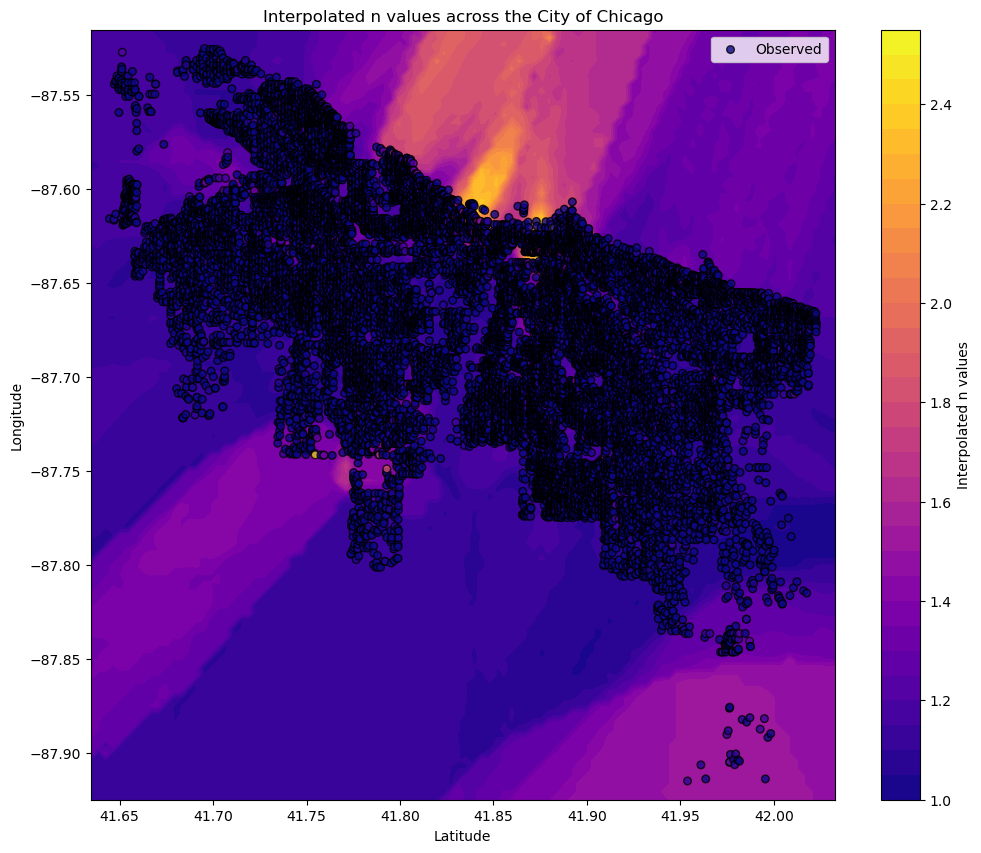

Spatial Interpolation Computation Time: 0.30 seconds


In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")
